This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

In [1]:
import wradlib as wrl
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import metpy
import requests
import matplotlib.pyplot as pl
import matplotlib.patheffects as pe
import matplotlib.colors
import openfonts
from matplotlib.colors import Normalize
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from metpy.plots import ctables
from osgeo import osr
from wradlib.io.xarray import CfRadial, OdimH5

import urllib
import io
import glob

try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()

from html.parser import HTMLParser

class DWDHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        if tag != 'a':
            return
        self.links.append(attrs[0][1])

parser = DWDHTMLParser()

radar = 'NHB'
DBZH = 'sweep_vol_z'
VRADH = 'sweep_vol_v'

opendata_url1 = (f"https://opendata.dwd.de/weather/radar/sites/{DBZH}/{radar.lower()}/hdf5/filter_polarimetric/")
with urllib.request.urlopen(opendata_url1) as url_request:
    response = url_request.read().decode("utf-8")

parser.links = []
parser.feed(response)
filelist1 = parser.links[1:]
filelist1.sort(key=lambda x: x.split('-')[2])
filelist1.reverse()

for f in filelist1[:10]:
    urllib.request.urlretrieve(os.path.join(opendata_url1, f), f)

flist = glob.glob('ras07-vol5minng01_sweeph5onem_dbzh_05-*')
vol = wrl.io.OdimH5(flist, standard='cf', georef=True)

list(vol)
time = vol.root.time_coverage_end

print(time.item())

time = time.item()

import dateutil.parser
time = dateutil.parser.parse(time)
time2 = time.strftime("%Y%m%d%H%M")
print(time2)

flist = glob.glob('ras07*')
for f in flist:
    os.remove(f)
    
vol.root


2021-11-29T15:13:01Z
202111291513


<xarray.Dataset>
Dimensions:              (sweep: 1)
Dimensions without coordinates: sweep
Data variables: (12/14)
    volume_number        int64 0
    platform_type        <U5 'fixed'
    instrument_type      <U5 'radar'
    primary_axis         <U6 'axis_z'
    time_coverage_start  <U20 '2021-11-29T15:12:31Z'
    time_coverage_end    <U20 '2021-11-29T15:13:01Z'
    ...                   ...
    altitude             float64 585.9
    altitude_agl         float64 nan
    sweep_group_name     (sweep) <U7 'sweep_1'
    sweep_fixed_angle    (sweep) float64 0.4999
    frequency            float64 nan
    status_xml           <U4 'None'
Attributes: (12/19)
    Conventions:          Cf/Radial
    version:              H5rad 2.2
    title:                None
    institution:          WMO:10605,NOD:denhb
    references:           None
    source:               None
    ...                   ...
    ray_times_increase:   "true" or "false", assumed "true" if missing. This ...
    field_names:          array of strings of field names present in this file.
    time_coverage_start:  copy of time_coverage_start global variable
    time_coverage_end:    copy of time_coverage_end global variable
    simulated data:       "true" or "false", assumed "false" if missing. data...
    instrument:           WMO:10605,NOD:denhb

dwd_app_202111291513.jpeg


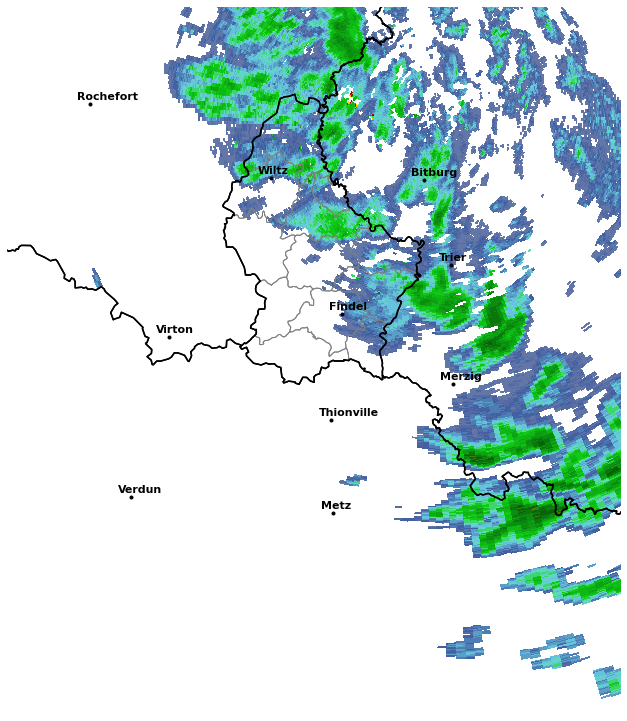

In [5]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.geodesic as cgeodesic
import shapely
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def plot_borders(ax):
    borders = cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='10m',
                                           facecolor='none')
    ax.add_feature(borders, edgecolor='black', lw=4, zorder=4)

map_trans = ccrs.AzimuthalEquidistant(central_latitude=vol['sweep_1'].latitude.values,
                                      central_longitude=vol['sweep_1'].longitude.values)

def plot_borders2(ax):
    filename = wrl.util.get_wradlib_data_file('geo/gadm36_LUX_0.shp')
    filename3 = wrl.util.get_wradlib_data_file('geo/gadm36_BEL_0.shp')
    filename4 = wrl.util.get_wradlib_data_file('geo/gadm36_FRA_0.shp')
    filename5 = wrl.util.get_wradlib_data_file('geo/gadm36_DEU_0.shp')
    filename6 = wrl.util.get_wradlib_data_file('geo/gadm36_DEU_1.shp')
    filename7 = wrl.util.get_wradlib_data_file('geo/gadm36_FRA_2.shp')
    filename8 = wrl.util.get_wradlib_data_file('geo/gadm36_BEL_2.shp')
    dataset, inLayer = wrl.io.open_vector(filename)
    dataset3, inLayer3 = wrl.io.open_vector(filename3)
    dataset4, inLayer4 = wrl.io.open_vector(filename4)
    dataset5, inLayer5 = wrl.io.open_vector(filename5)
    #dataset6, inLayer6 = wrl.io.open_vector(filename6)
    #dataset7, inLayer7 = wrl.io.open_vector(filename7)
    #dataset8, inLayer8 = wrl.io.open_vector(filename8)
    borders, keys = wrl.georef.get_vector_coordinates(inLayer)
    borders3, keys3 = wrl.georef.get_vector_coordinates(inLayer3)
    borders4, keys4 = wrl.georef.get_vector_coordinates(inLayer4)
    borders5, keys5 = wrl.georef.get_vector_coordinates(inLayer5)
    #borders6, keys6 = wrl.georef.get_vector_coordinates(inLayer6)
    #borders7, keys7 = wrl.georef.get_vector_coordinates(inLayer7)
    #borders8, keys8 = wrl.georef.get_vector_coordinates(inLayer8)
    wrl.vis.add_lines(ax, borders, color='black', lw=1.5, zorder=4,transform=ccrs.PlateCarree())
    wrl.vis.add_lines(ax, borders3, color='black', lw=1.5, zorder=4,transform=ccrs.PlateCarree())
    wrl.vis.add_lines(ax, borders4, color='black', lw=1.5, zorder=4,transform=ccrs.PlateCarree())
    wrl.vis.add_lines(ax, borders5, color='black', lw=1.5, zorder=4,transform=ccrs.PlateCarree())
    #wrl.vis.add_lines(ax, borders6, color='grey', lw=0.5, zorder=4,transform=ccrs.PlateCarree())
    #wrl.vis.add_lines(ax, borders7, color='grey', lw=0.5, zorder=4,transform=ccrs.PlateCarree())
    #wrl.vis.add_lines(ax, borders8, color='grey', lw=0.5, zorder=4,transform=ccrs.PlateCarree())
    
def plot_cant(ax):
    filename6 = wrl.util.get_wradlib_data_file('geo/gadm36_LUX_2.shp')
    dataset6, inLayer6 = wrl.io.open_vector(filename6)
    borders6, keys6 = wrl.georef.get_vector_coordinates(inLayer6)
    wrl.vis.add_lines(ax, borders6, color='grey', lw=1, zorder=4,transform=ccrs.PlateCarree())

#def plot_cities(ax):
#    lats = [49.75,49.627,49.5,49.66,49.97,49.545,49.556,49.83]
#    lons = [6.1,6.21,5.99,5.92,5.93,6.367,5.875,5.85]
#    cities = ['Mersch','Findel','Esch/Alzette','Steinfort','Wiltz','Remich','Pétange','Rambrouch']
#    for lon, lat, city in zip(lons, lats, cities):
#        ax.plot(lon, lat, 'k+', zorder=5, transform=ccrs.PlateCarree())
#        ax.text(lon + 0.01, lat + 0.01, city, fontsize='14', color='white', 
#                path_effects=[pe.withStroke(linewidth=2.5, foreground="black")],
#                transform=ccrs.PlateCarree())
        
def plot_cities(ax):
    lats = [49.627,49.97,49.1193,49.75,49.4490,49.5676,49.9664,50.15828,49.1599,49.357273]
    lons = [6.21,5.93,6.1757,6.6371,6.6438,5.5335,6.5299,5.22335,5.3844,6.168438]
    cities = ['Findel','Wiltz','Metz','Trier','Merzig','Virton','Bitburg','Rochefort','Verdun','Thionville']
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'k.', zorder=5, alpha=1, transform=ccrs.PlateCarree())
        ax.text(lon - 0.05, lat + 0.01, city, fontsize='11', fontweight='bold', color='black', zorder=5, alpha=1,
                transform=ccrs.PlateCarree())
        
        #path_effects=[pe.withStroke(linewidth=2.5, foreground="black")]
        
def plot_radloc(ax):
    lats = [50.1097]
    lons = [6.5483]
    cities = ['']
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'ro', zorder=5, path_effects=[pe.withStroke(linewidth=2.5, foreground="black")],
                transform=ccrs.PlateCarree())
        ax.text(lon + 0.01, lat + 0.01, city, fontsize='14', color='white', 
                path_effects=[pe.withStroke(linewidth=2.5, foreground="black")],
                transform=ccrs.PlateCarree())

map_proj = ccrs.Mercator(central_longitude=vol['sweep_1'].longitude.values)
fig = pl.figure(figsize=(15,13))
ax = fig.add_subplot(111, projection=map_proj)

pl.rcParams["font.family"] = "OpenSans"


colors=[(0.0, 0.9254901960784314, 0.9254901960784314), 
                    (0.00392156862745098, 0.6274509803921569, 0.9647058823529412), 
                    (0.0, 0.0, 0.9647058823529412), 
                    (0.0, 1.0, 0.0), 
                    (0.0, 0.7843137254901961, 0.0), 
                    (0.0, 0.5647058823529412, 0.0), 
                    (1.0, 1.0, 0.0), 
                    (0.9058823529411765, 0.7529411764705882, 0.0), 
                    (1.0, 0.5647058823529412, 0.0), 
                    (1.0, 0.16078431372, 0.16078431372), 
                    (0.7529411764705882, 0.0, 0.0),
                    (0.59765625, 0.0, 0.0), 
                    (1.0, 0.0, 1.0), 
                    (0.6, 0.3333333333333333, 0.788235294117647), 
                    (0.8984375, 0.8984375, 0.8984375)]
cmap1 = ListedColormap(colors)
cmap = ctables.colortables.get_colortable('NWSStormClearReflectivity')

newcmap = ListedColormap(cmap(np.linspace(0.25, 0.92, 28)))

DBZH = vol['sweep_1'].DBZH
pm = DBZH.where(DBZH>-1).wradlib.plot_ppi(ax=ax, cmap=newcmap, fig=fig, vmin=0,vmax=70,zorder=4)
#gl = ax.gridlines(draw_labels=True,linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
#gl.xlabels_top = False
#gl.ylabels_right = False
#gl.xlabel_style = {'size': 12, 'color': 'black'}
#gl.ylabel_style = {'size': 12, 'color': 'black'}
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
ax.set_extent([4.9, 7.3, 48.6, 50.4])
#txt = pl.title(time.strftime("%d.%m.%Y %H:%M UTC"),fontsize=25)
#cb = pl.colorbar(pm, ax=ax, shrink=0.9, ticks=[-20,-10,0,10,20,30,40,50,60,70],orientation='vertical')
#cb.set_label("dBZ",fontsize=20)
#cb.ax.tick_params(labelsize=20)
plot_cant(ax)
plot_borders2(ax)
plot_cities(ax)
#plot_radloc(ax)
pl.gca().set_aspect('equal')
#pl.gcf().text(0.16, 0.865, 'Product: 0.8° Base Reflectivity', fontsize=10)
#pl.gcf().text(0.16, 0.85, 'Data: DWD', fontsize=10)

#circle_points = cgeodesic.Geodesic().circle(lon=6.55, lat=50.11, radius=150000, n_samples=1000, endpoint=False)
#geom = shapely.geometry.Polygon(circle_points)
#circle_points2 = cgeodesic.Geodesic().circle(lon=6.55, lat=50.11, radius=200000, n_samples=1000, endpoint=False)
#geom2 = shapely.geometry.Polygon(circle_points2)
#ax.add_geometries((geom2,), crs=cartopy.crs.PlateCarree(), facecolor='grey', edgecolor='none',linewidth=3)
#ax.add_geometries((geom,), crs=cartopy.crs.PlateCarree(), facecolor='white', edgecolor='grey',linewidth=3, zorder=1)

import matplotlib.image as image

#im = image.imread('dwd.png')

#ax2 = fig.add_axes([0.238,-0.01,0.055,0.334])
#ax2.axis('off')
#ax2.imshow(im, aspect='equal', origin='upper', zorder=6)

base_filename='dwd_app_'
suffix='.jpeg'
latest='latest'
my_file = base_filename+time2+suffix
print(my_file)
pl.axis('off')
pl.savefig(my_file, bbox_inches='tight', pad_inches=0, dpi=150)

In [3]:
import matplotlib.font_manager
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))